# Лабораторна робота №6
## Дисципліна: Інтелектуальний аналіз даних (ІАД)
## Тема: Основи роботи з бібліотекою TensorFlow
**Виконала:** Гульчак Дар'я МІТ-31
### Мета роботи
Ознайомитися з базовими поняттями та операціями бібліотеки машинного навчання TensorFlow (створення тензорів, математичні операції, зміна розмірності), навчитися використовувати GPU для обчислень, а також генерувати та візуалізувати синтетичні набори даних для задач регресії та класифікації.

### Завдання
1. **Основні операції з TensorFlow:**
    * Створити вектор, скаляр, матрицю та тензор.
    * Знайти форму, ранг та розмір тензорів.
    * Створити тензори з випадковими значеннями та виконати операції множення (матричне та скалярне).
    * Робота з тензорами зображень (пошук min/max значень, стиснення/squeeze).
    * Робота з індексацією (argmax) та one-hot кодуванням.
2. **Перевірка доступу до графічного процесора (GPU).**
3. **Генерація та візуалізація даних:**
    * Згенерувати набір даних для регресії.
    * Згенерувати набір даних для класифікації.
    * Здійснити графічний аналіз наборів даних за допомогою Matplotlib.

1. Імпорт бібліотек 
---
Для початку роботи необхідно підключити бібліотеки TensorFlow, NumPy (для роботи з масивами) та Matplotlib (для візуалізації).

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles
print(tf.__version__)

2.20.0


2. Створення тензорів та визначення їх властивостей
---
Виконуємо завдання 1 та 2. Створимо скаляр (ранг 0), вектор (ранг 1), матрицю (ранг 2) та тензор (ранг 3 або вище). Після цього виведемо на екран їхню форму (shape), ранг (ndim) та загальний розмір.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


scalar = tf.constant(7)
vector = tf.constant([10, 10])
matrix = tf.constant([[10, 7], [7, 10]])
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]]])

def print_tensor_info(t):
    print(t.shape, t.ndim, tf.size(t).numpy())

print_tensor_info(scalar)
print_tensor_info(vector)
print_tensor_info(matrix)
print_tensor_info(tensor)

() 0 1
(2,) 1 2
(2, 2) 2 4
(2, 2, 3) 3 12


3. Генерація випадкових тензорів
---
Виконуємо завдання 3. Створимо два тензори однакової форми [5, 300] зі значеннями в діапазоні від 0 до 1. Встановимо seed для відтворюваності результатів.

In [32]:
import tensorflow as tf
tf.random.set_seed(42)
random_tensor_1 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
random_tensor_2 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
print(f"Тензор 1 створено з формою: {random_tensor_1.shape}")
print(f"Тензор 2 створено з формою: {random_tensor_2.shape}")

Тензор 1 створено з формою: (5, 300)
Тензор 2 створено з формою: (5, 300)


4. Матричне множення
---
Виконуємо завдання 4. Щоб помножити дві матриці розміром [5, 300], необхідно, щоб кількість стовпців першої матриці дорівнювала кількості рядків другої. Тому ми транспонуємо другий тензор, отримуючи форму [300, 5]. Результат матиме форму [5, 5].

In [33]:
import tensorflow as tf

tf.random.set_seed(42)
random_tensor_1 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
random_tensor_2 = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)

print("Тензори створено:", random_tensor_1.shape)

Тензори створено: (5, 300)


5. Скалярний добуток (Поелементне множення)
---
Виконуємо завдання 5. Тут виконується множення відповідних елементів двох тензорів однакової форми.

In [34]:
import tensorflow as tf


element_wise_mult = tf.multiply(random_tensor_1, random_tensor_2)
print(element_wise_mult.shape)

(5, 300)


6. Робота з тензорами зображень
---
Виконуємо завдання 6 та 7. Створимо тензор, що імітує зображення (висота, ширина, канали кольору), та знайдемо його мінімальне і максимальне значення.

In [35]:
image_tensor = tf.random.uniform(shape=[224, 224, 3], minval=0, maxval=1)
min_val = tf.reduce_min(image_tensor)
max_val = tf.reduce_max(image_tensor)
print(min_val.numpy(), max_val.numpy())

2.3841858e-07 0.9999918


7. Зміна розмірності (Squeeze)
---
Виконуємо завдання 8. Створимо тензор із зайвою віссю розміру 1 і видалимо її за допомогою методу squeeze.

In [36]:
large_tensor = tf.random.uniform(shape=[1, 224, 224, 3], minval=0, maxval=1)
print(large_tensor.shape)
squeezed_tensor = tf.squeeze(large_tensor)
print(squeezed_tensor.shape)

(1, 224, 224, 3)
(224, 224, 3)


8. Пошук максимуму та One-Hot кодування
---
Виконуємо завдання 9 та 10. Знайдемо індекс максимального елемента у векторі, а потім застосуємо до цього індексу one-hot кодування (перетворення в бінарний вектор).

In [37]:
my_tensor = tf.constant([3, 7, 1, 9, 12, 5, 20, 2, 8, 4])
max_index = tf.argmax(my_tensor)
print(max_index.numpy())

one_hot_index = tf.one_hot(max_index, depth=10)
print(one_hot_index.numpy())

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


9. Перевірка GPU
---
Перевіримо, чи доступний графічний процесор для обчислень.

In [38]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(physical_devices)
else:
    print("GPU not found")

GPU not found


10. Генерація даних та графічний аналіз
---
Згенеруємо два набори даних: один для задачі регресії (лінійна залежність), інший — для класифікації (концентричні кола). Візуалізуємо їх на графіках.

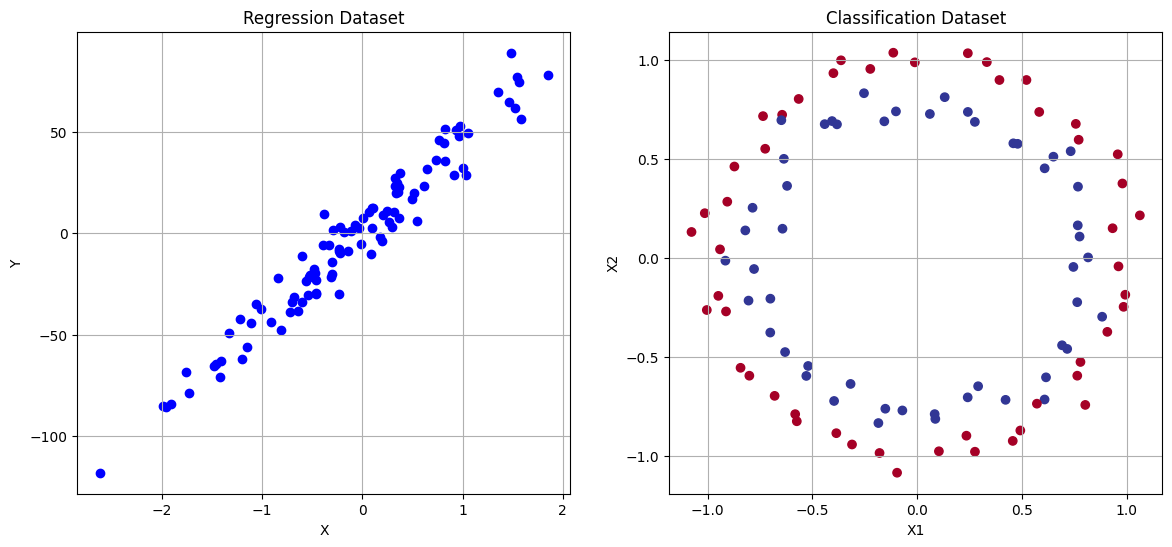

: 

In [ ]:
from sklearn.datasets import make_regression, make_circles
X_reg, y_reg = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_class, y_class = make_circles(n_samples=100, noise=0.05, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_reg, y_reg, c='blue')
plt.title('Regression Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap=plt.cm.RdYlBu)
plt.title('Classification Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)

plt.show()